# Preprocessing Images for OCR

# 0 - Opening an image

In [2]:
import cv2
import matplotlib.pyplot as plt
#image_file = r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\image1.jpg"
image_file = "images/image1.jpg"
img = cv2.imread(image_file)


In [49]:
## Function to show the image inline

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size withh one axes that takes up the full figure
    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc
    ax.axis('off')

    # Display the image
    ax.imshow(im_data, cmap='gray')

    plt.show()

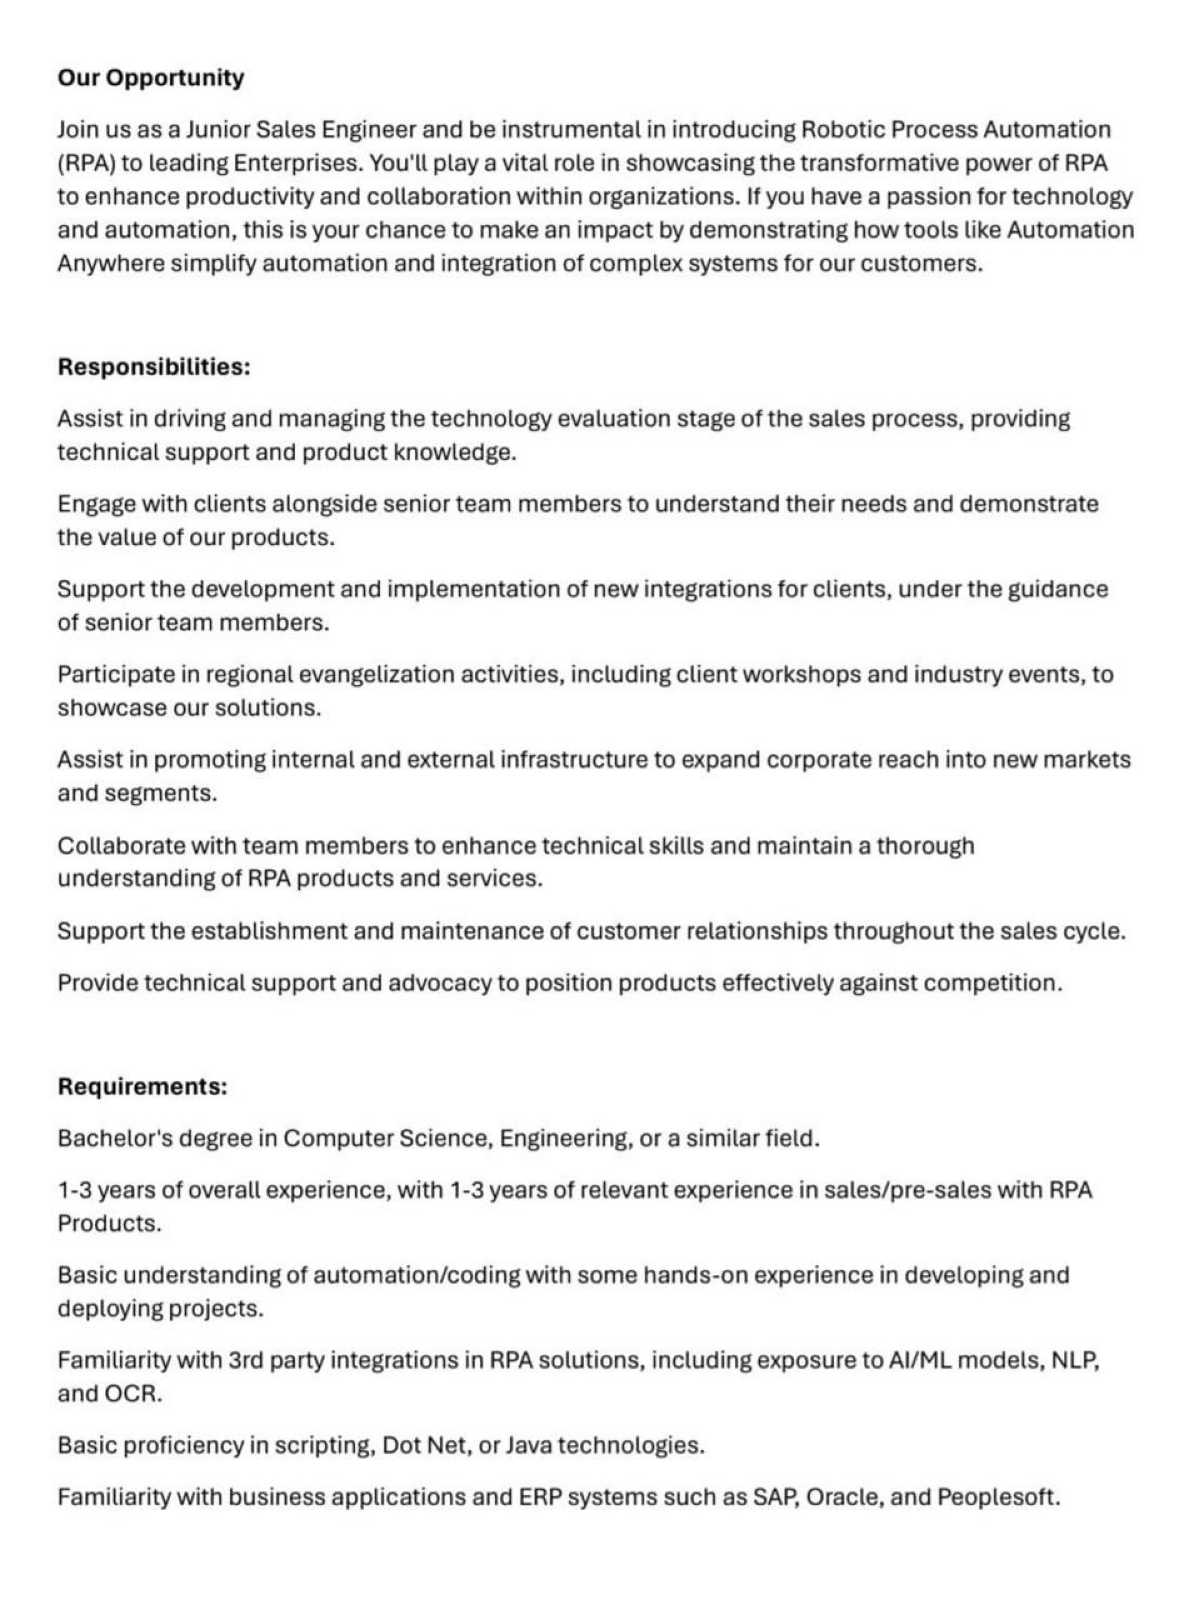

In [50]:
display(image_file)

In [51]:
## Another way to show the image but in a new window
cv2.imshow("original image",img)
cv2.waitKey(0)

-1

## 1: Inverted images

In [52]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\inverted.jpg", inverted_image)

True

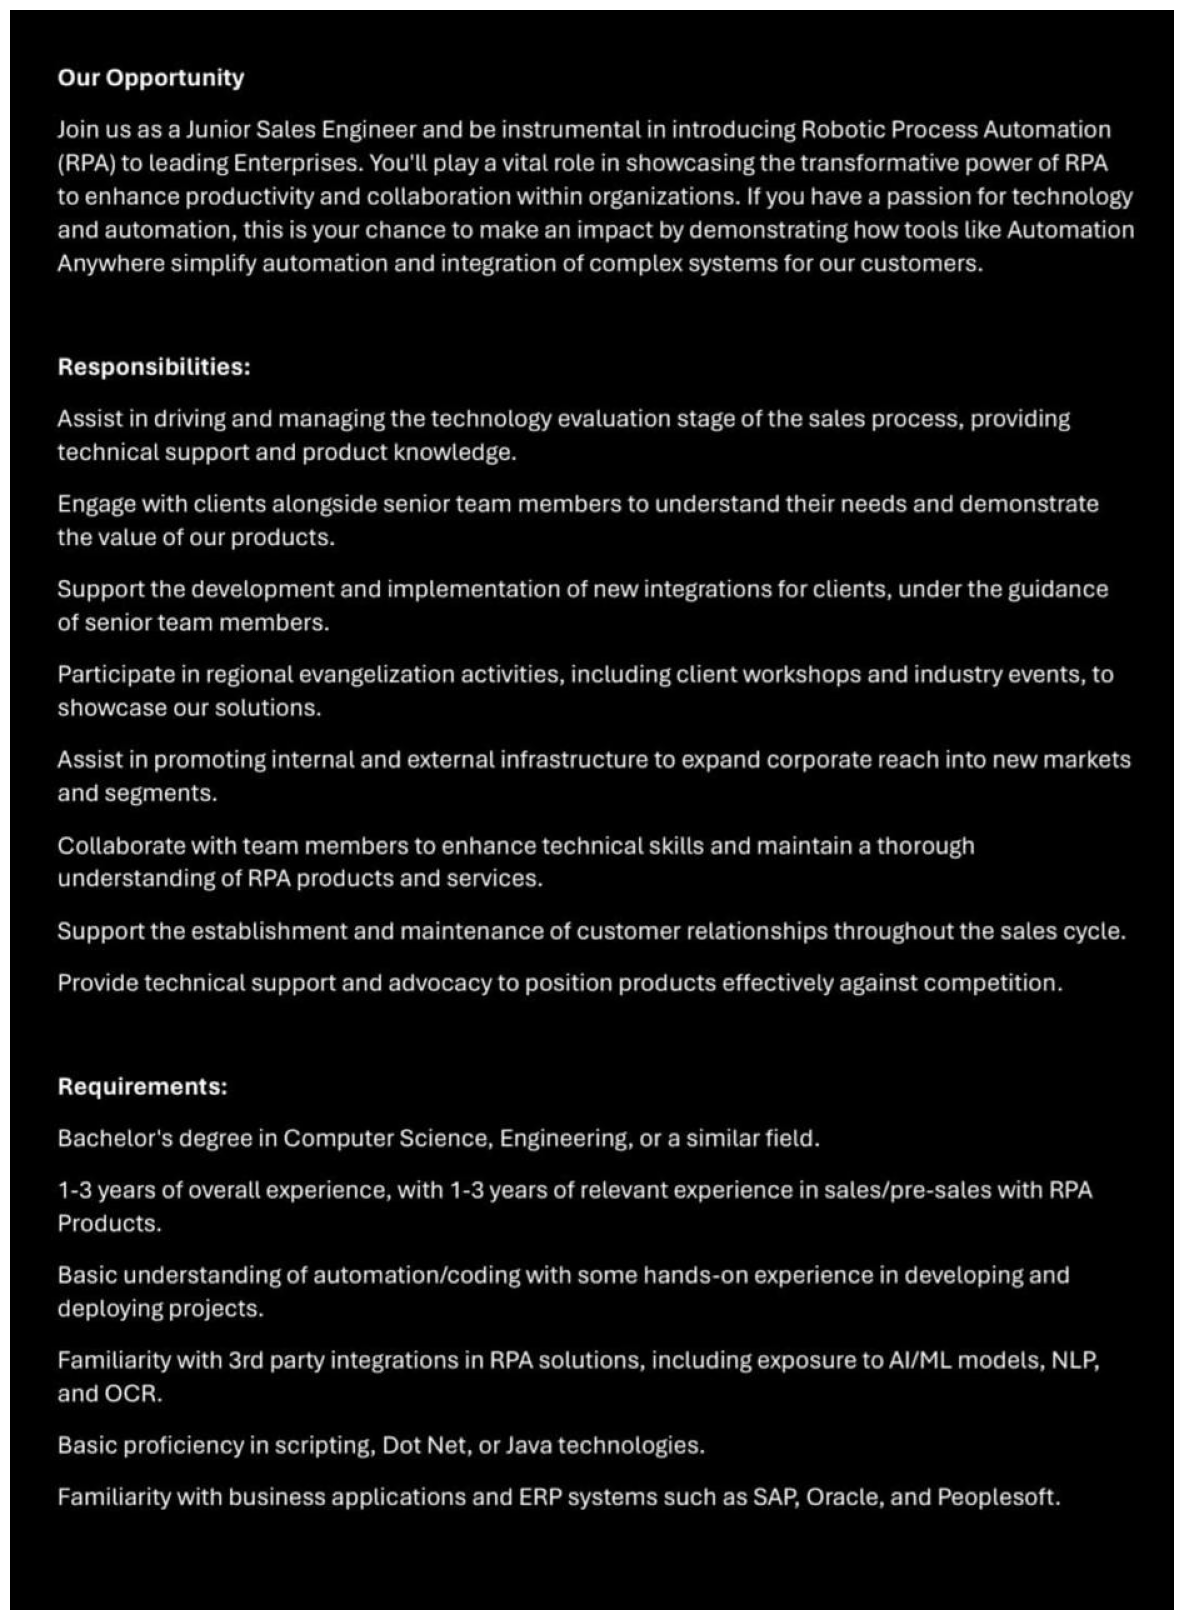

In [53]:
display(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\inverted.jpg")

## 2:Rescaling

## 3: Binarization

In [54]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [55]:
gray_image = grayscale(img)
cv2.imwrite(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\gray.jpg", gray_image)

True

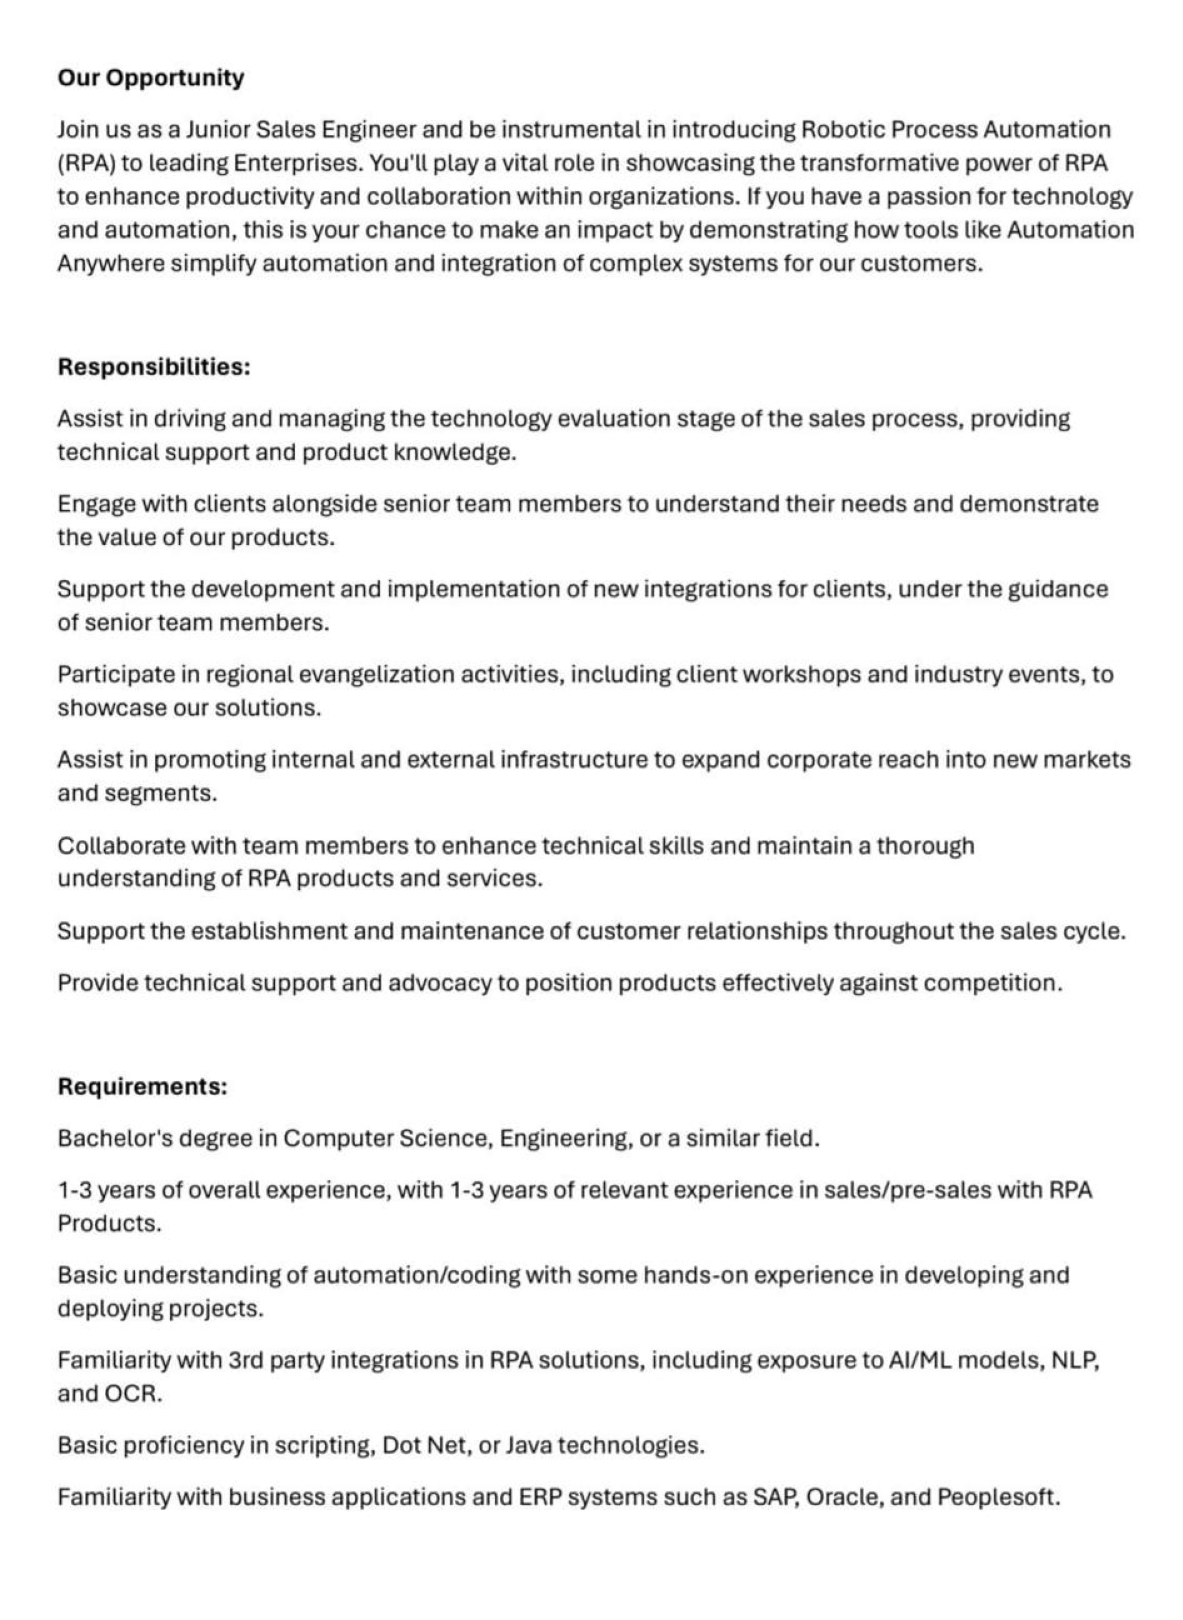

In [56]:
display(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\gray.jpg")

In [83]:
thresh, im_bw = cv2.threshold(gray_image, 180, 240, cv2.THRESH_BINARY)
cv2.imwrite(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\bw_image.jpg",im_bw)

True

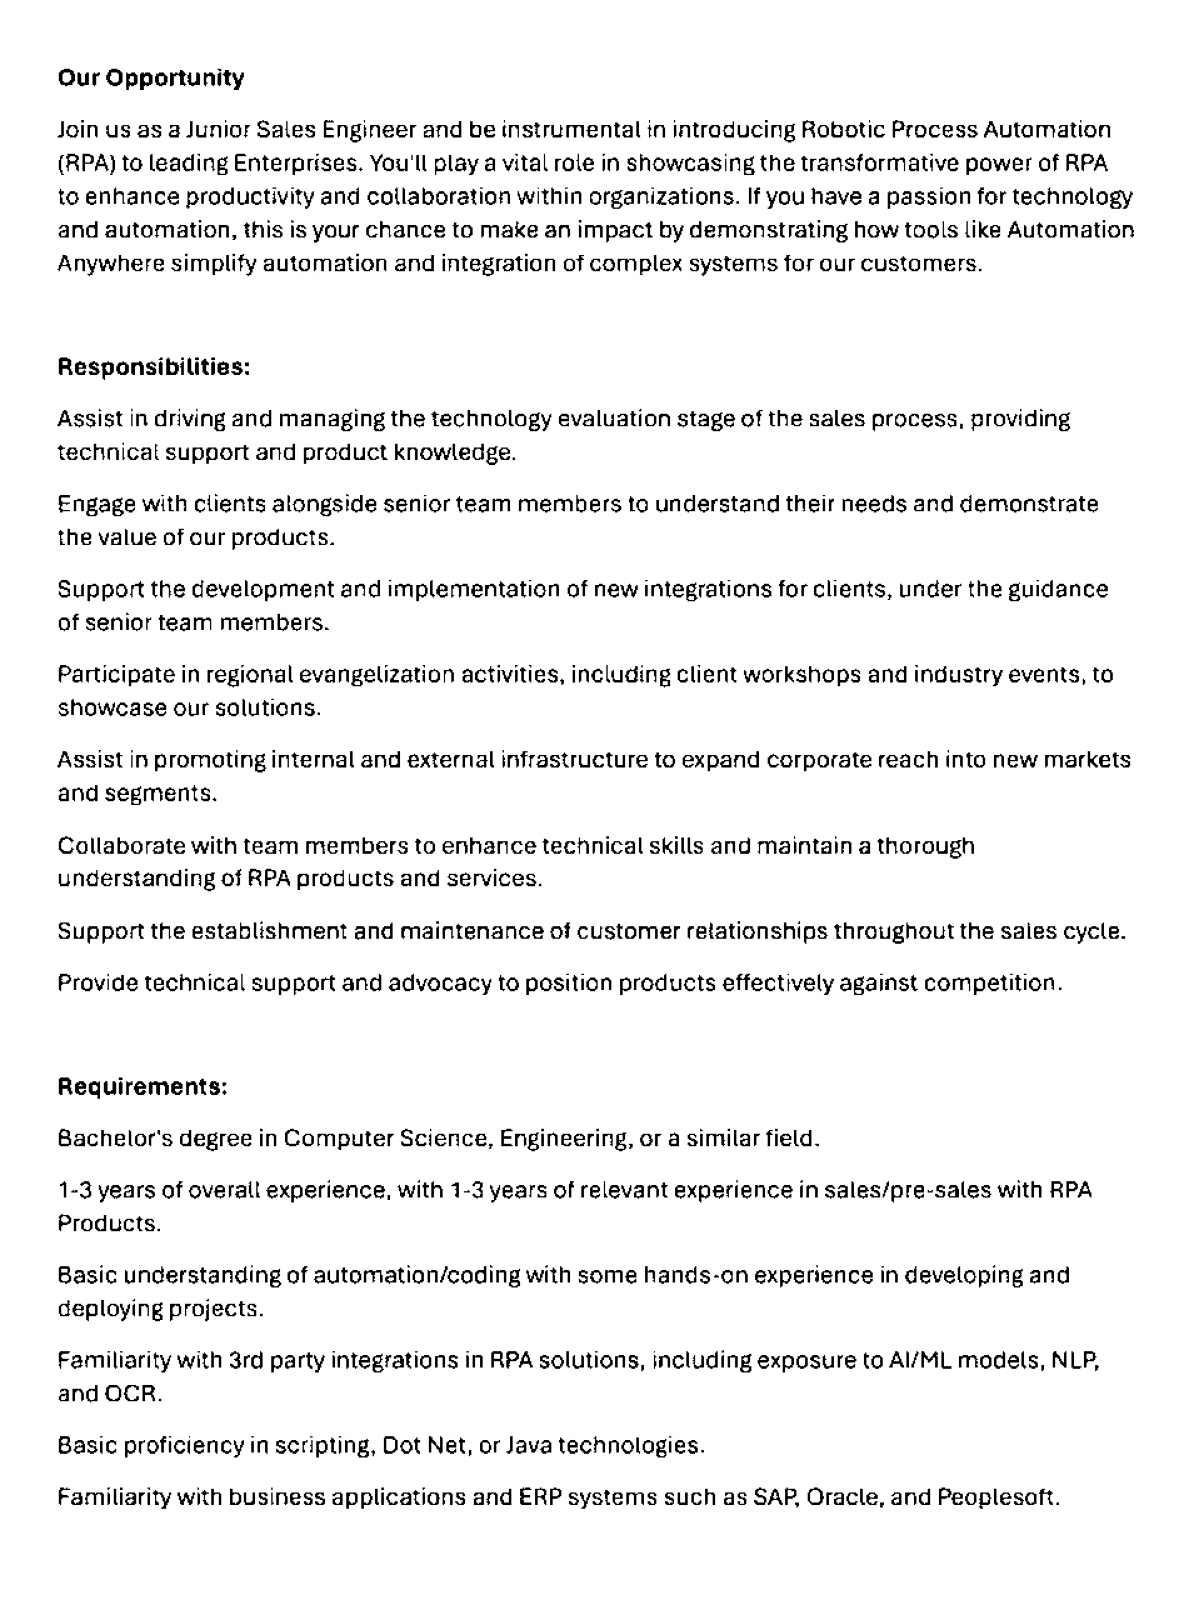

In [70]:
display(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\bw_image.jpg")

## 4: Noise Removal

In [80]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [84]:
no_noise = noise_removal(im_bw)
cv2.imwrite(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\no_noise.jpg", no_noise)

True

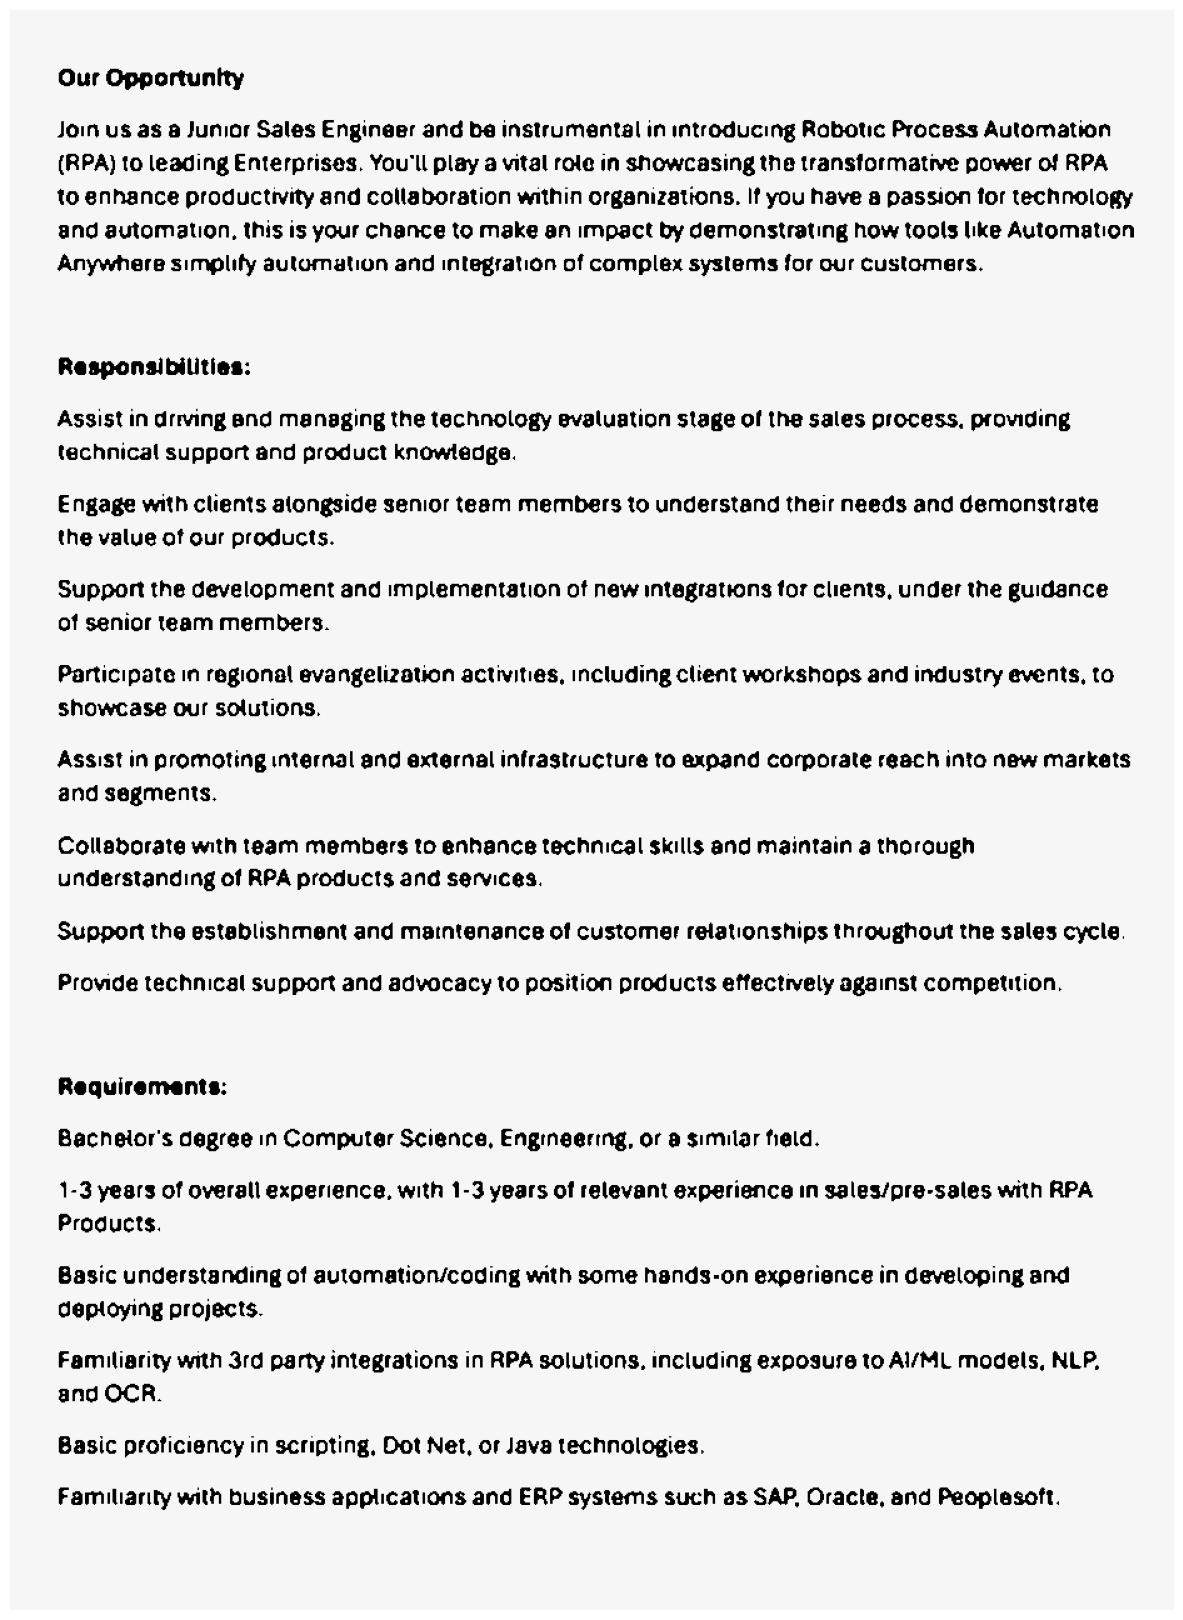

In [85]:
display(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\no_noise.jpg")

## Dilation and Erosion

Used it when there is no noise in the background but for fonts that look too thin or thick. This helps adjust the font sizes

In [106]:

def thin_font(image):
    import numpy as np
    # invert the image
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1) # Thin the text
    image = cv2.bitwise_not(image)

    return (image)

In [107]:
eroded_image = thin_font(no_noise)
cv2.imwrite(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\eroded_image.jpg", eroded_image)


True

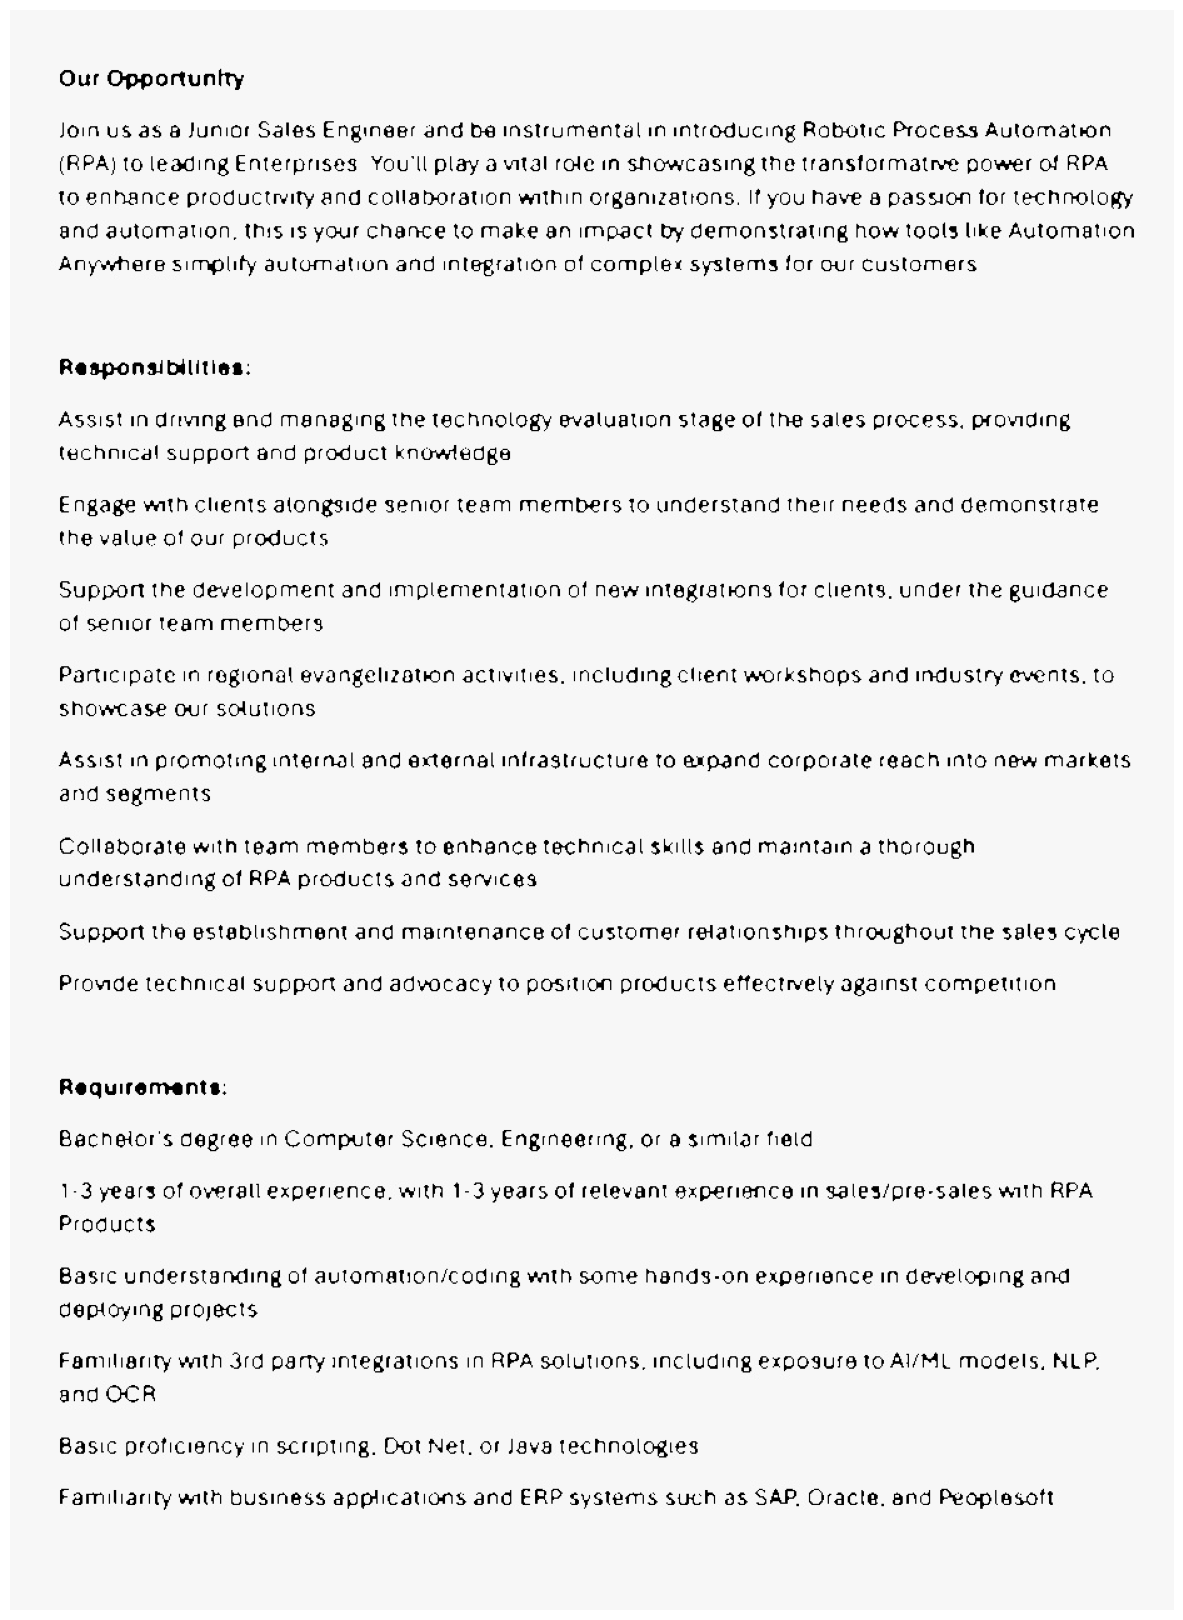

In [108]:
display(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\eroded_image.jpg")

In [109]:
def thick_font(image):
    import numpy as np
    # invert the image
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1) # Thin the text
    image = cv2.bitwise_not(image)

    return (image)

In [110]:
dilated_image = thick_font(no_noise)
cv2.imwrite(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\dilated_image.jpg", dilated_image)

True

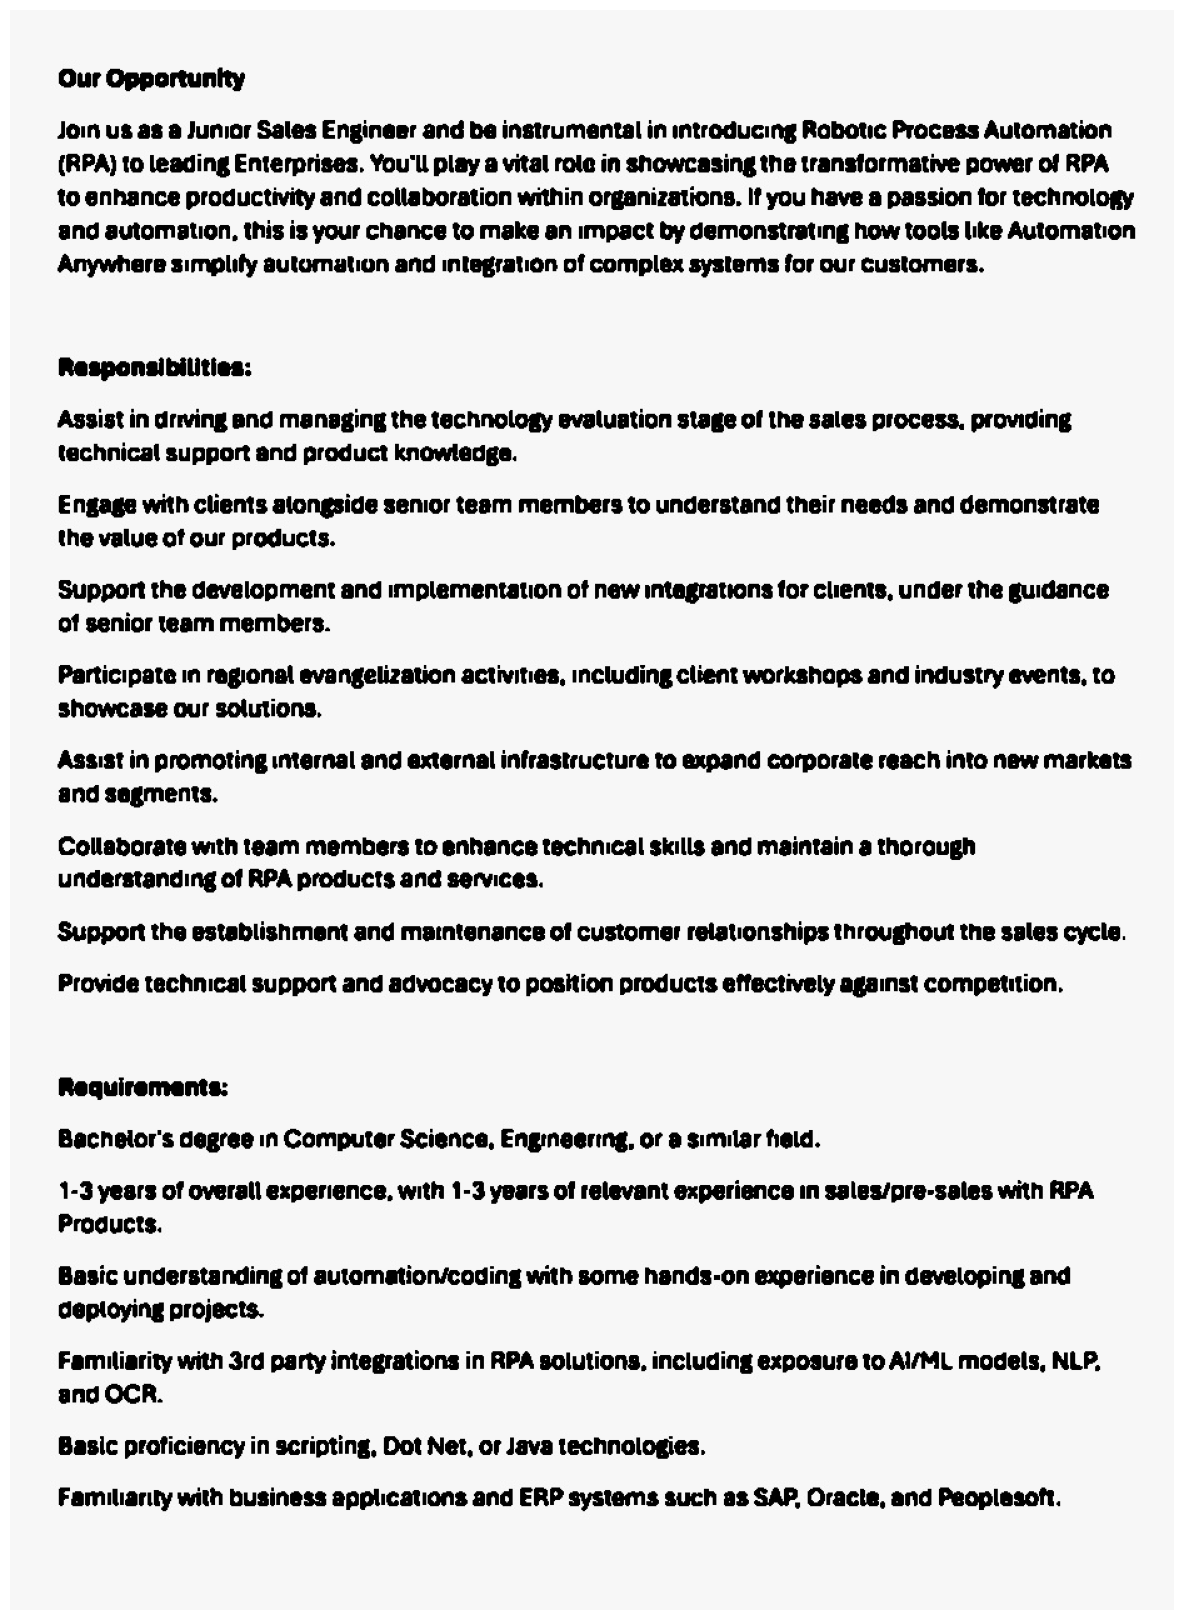

In [111]:
display(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\dilated_image.jpg")

## 6: Rotation / Deskewing

In [116]:
new = cv2.imread(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\page__01_rotated.jpg")


In [117]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [118]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [119]:
fixed = deskew(new)
cv2.imwrite(r"C:\Users\alexe\Documentos\ProfessionalPortfolio\Personal Proyects\OCR\images\results\rotated_text.jpg", fixed)

AttributeError: 'NoneType' object has no attribute 'copy'